# Mian Idea

The main goal of this application is to build an AI-based doctor, E-Doctor, which provide mdeical warning and advice to prevent certain health condition. Base on the previous application, kaggle's heart disease detection, the best model is XGB model. Therefore, the E-Doctor will be trained with XGB model.

E-doctor will be able to detect heart disease, high blood pressure, diabete, and blооd cholesterol.

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import silhouette_score, rand_score, davies_bouldin_score, r2_score,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from xgboost import plot_importance
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import  GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt
import random

## A. Prepare Data

### Read Data

In [2]:
def read_data():
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    return train_data, test_data

### Remove Failed and Null Data

Column List: HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income, target

--Feature list: CholCheck, BMI, Smoker, Stroke, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income

--Prediction list: HighBP, HighChol, Diabetes, target

In [3]:
#Choose features and prediction and Drop unwanted data
def fea_select(train_data, prediction):
    Xtrain = train_data.drop(['target','HighBP', 'HighChol', 'Diabetes','PatientID'], axis = 'columns')
    Ytrain = train_data[prediction]
    return Xtrain, Ytrain

In [4]:
def TrainTestSplit(X, Y):
    #write function here
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.25, random_state=42, stratify =Y)
    return Xtrain, Xtest, ytrain, ytest

## Separate Data

In [6]:
#Drop unuseful feature and select what to predict
train_data, test_data = read_data()
X_HB, Y_HB = fea_select(train_data,'HighBP')
X_HD, Y_HD = fea_select(train_data,'target')
X_HC, Y_HC = fea_select(train_data,'HighChol')
X_D, Y_D = fea_select(train_data,'Diabetes')

## E. Main Code: Application 2 - E-Doctor

In [7]:
#Splite data
train_data, test_data = read_data()
X_HB, Y_HB = fea_select(train_data,'HighBP')
X_HD, Y_HD = fea_select(train_data,'target')
X_HC, Y_HC = fea_select(train_data,'HighChol')
X_D, Y_D = fea_select(train_data,'Diabetes')

#Apply XGB model
XGB = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, objective='binary:logistic', 
                    booster='gbtree', n_jobs=2, gamma=0.001,subsample=1,colsample_bytree=1, colsample_bylevel=1,             # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                    colsample_bynode=1,reg_alpha=1,reg_lambda=0, scale_pos_weight=1, base_score=0.5, random_state=20201107,        # Seed
                   )
#XGB models
HB_model = XGB.fit(X_HB, Y_HB)
HD_model = XGB.fit(X_HD, Y_HD)
HC_model = XGB.fit(X_HC, Y_HC)
D_model = XGB.fit(X_D, Y_D)

C:\Users\JEFF LEE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [8]:
def patient():
    #Patient's self-essement
    name = input('Enter your name:')
    Age = int(input('Enter your age(Enter int range from 1 to 100):'))//99*13
    PhysActivity = int(input('How many days of physical асtіvіtу during the past 30 days(Enter int range from 0 to 30):'))
    Fruits = int(input('Have you eat fruit everyday?(0: no, 1: yes):'))
    Veggies = int(input('Have you eat vegetables everyday?(0: no, 1: yes):'))
    Income = int(input('Rate your аnnuаl household income?(Enter int range from 1 to 8):'))
    Smoker = int(input('Are you a Smoker who smoked аt least 100 сіgаrеttеѕ( 0: no, 1: yes):'))
    #Pull Out Patience medical record
    sample = random.randint(0, len(test_data))
    med_rec = test_data[sample: sample + 1].copy(deep=True)
    med_rec = med_rec.drop(['HighBP','HighChol', 'CholCheck','Diabetes', 'PatientID'], axis = 'columns')
    med_rec = med_rec.reset_index()
    #Joint all data
    med_rec.loc[0, 'Age'] = Age
    med_rec.loc[0, 'PhysActivity'] = PhysActivity
    med_rec.loc[0, 'Fruits'] = Fruits
    med_rec.loc[0, 'Veggies'] = Veggies
    med_rec.loc[0, 'Income'] = Income
    med_rec.loc[0, 'Smoker'] = Smoker
    return name, med_rec

In [9]:
#Asking Doctor
def e_doc(name,info):
    Result1  = HB_model.predict(info)
    Result2  = HD_model.predict(info)
    Result3  = HC_model.predict(info)
    Result4  = D_model.predict(info)
    if Result1 == 1: 
        print(name, 'May have High Blood Pressure!')
    if Result2 == 1: 
        print(name, 'May have Heart Disease!')
    if Result3 == 1: 
        print(name, 'May have Blооd Cholesterol!')
    if Result3 == 1: 
        print(name, 'May have Diabete!')
        
    return Result1 | Result2 | Result3 | Result4

Enter your name:Amy
Enter your age(Enter int range from 1 to 100):98
How many days of physical асtіvіtу during the past 30 days(Enter int range from 0 to 30):20
Have you eat fruit everyday?(0: no, 1: yes):1
Have you eat vegetables everyday?(0: no, 1: yes):1
Rate your аnnuаl household income?(Enter int range from 1 to 8):1
Are you a Smoker who smoked аt least 100 сіgаrеttеѕ( 0: no, 1: yes):1


,index,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,22894,29,1,0,20,1,1,0,1,0,3,5,0,0,1,0,6,1


Amy is very healthy!


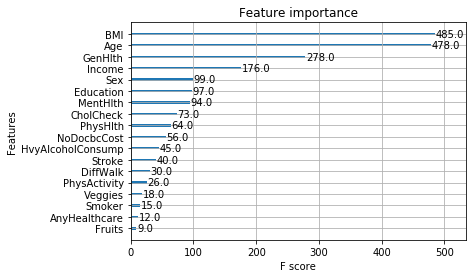

In [10]:
name,med_rec = patient()
if e_doc(name,med_rec) == 1:
    print(name, 'should watch BMI!')
else:
    print(name, 'is very healthy!')
    
plot_importance(HB_model)
plt.show()